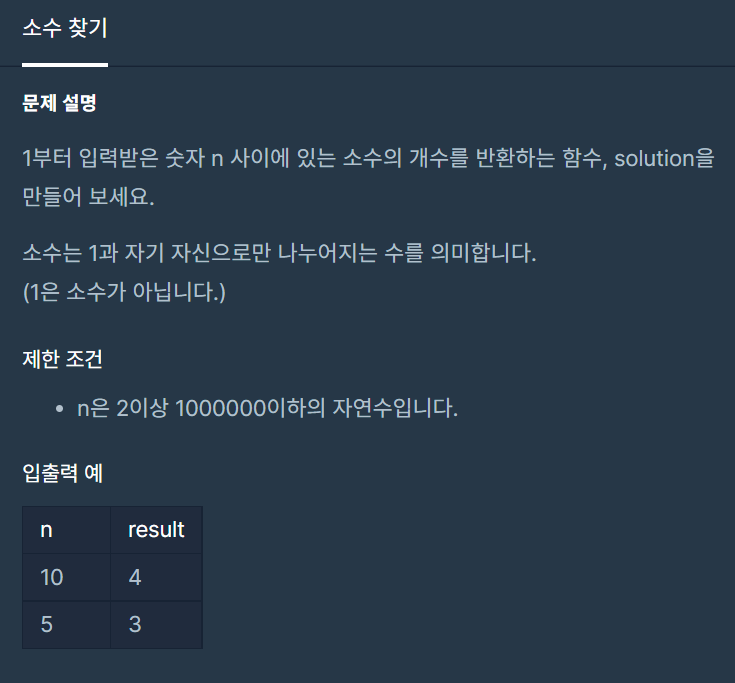

![image](https://user-images.githubusercontent.com/70187490/125730649-59f2712c-b565-4fb9-b534-16cba5af5c44.png)

# 1. 가장 기초적인 방법인 이중 for문으로 풀었는데 효율성에서 시간초과의 결과를 얻음

In [1]:
n = 10
def solution(n):
    answer = 0
    
    for i in range(1, n+1):
        divider = 0
        for z in range(1, i+1):
            if i % z ==0:
                divider = divider + 1
        if divider == 2:
            answer += 1
            
    return answer

solution(n)

4

# 2. 에라토스테네스의 체의 방법을 쓰기로 했다.
## 2-1. 소수를 구하고자 하는 구간의 모든 수를 나열한다.

In [2]:
import numpy as np

n = 10
number = np.arange(2, 11)
number

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

## 2는 소수이므로 자기자신을 제외한 2의 배수를 모두 지운다.

In [3]:
number = number[ (number[:] == 2) | (number % 2 !=0) ]
number

array([2, 3, 5, 7, 9])

## 남아있는 수 가운데 3은 소수이므로 3의 배수를 모두 지운다.

In [4]:
number = number[ (number[:] == 3) | (number % 3 !=0) ]
number

array([2, 3, 5, 7])

## 인덱스 처리화

In [5]:
def solution(n):

    import numpy as np
    number = np.arange(2, n+1)

    for value in number:
        number = number[ (number == value) | (number % value != 0) ]
            
    return len(number)

n=10
solution(n)

4

# 아직도 효율성 테스트에서 실패했다.
- 앞서했던 for문에서 number를 업데이트하지 않아 len(number)만큼 돌아가는 것이 실패의 원인!
## 에라토스테네스의 체를 다른 식으로 구현하자
1. 배열을 int타입이 아닌 bool type으로 구현
2. 어처피 나누는 수는 $n^2$정도만 하면 된다.

In [6]:
n = 120
number = np.array([True] * n, dtype="bool")

divider = int(np.sqrt(n))
divider

10

In [7]:
for i in range(2,10):
    print(2,'x',i,'=',2*i)

2 x 2 = 4
2 x 3 = 6
2 x 4 = 8
2 x 5 = 10
2 x 6 = 12
2 x 7 = 14
2 x 8 = 16
2 x 9 = 18


In [8]:
120//7

17

In [46]:
n = 10
number = [True] * n
number[0]= False

divider = int(np.sqrt(n))
for i in range(2, divider + 1):
    if number[i] == True:
        for j in range(i+i, n, i):
#             print(j)
            number[j] = False
number

[False, True, True, True, False, True, False, True, False, False]

In [ ]:
def solution(n):
    number = [True] * n
    number[0]= False

    divider = int(np.sqrt(n))
    for i in range(2, divider + 1):
        if number[i] == True:
            for j in range(i+i, n, i):
    #             print(j)
                number[j] = False
    return sum(number)

# 큰수에서 잘 돌아가지만 작은 수 경우에 오류가 나는 시기가 있다.
- 다른 방법을 찾아봐야 한다.

In [64]:
n = 5
num_array = np.arange(2, n+1)

for i in range(2, n+1):
    if i in num_array:
        num_array=np.setdiff1d(num_array, np.arange(i*2, n+1, i))
len(num_array)

3

애써 numpy로 풀었지만 이게 효율성 측면에서 더 좋지 않았다.

In [53]:
def solution(n):
	# 2부터 n까지의 숫자 배열 만들기
    num_set = set(range(2, n+1))
    for i in range(2, n+1):
        if i in num_set: # 배수 제거
            num_set -= set(range(i*2, n+1, i))

    answer = len(num_set)

    return answer

n = 100
solution(n)

25